In [1]:
import cv2#cv2라이브러리를 이용해서 이미지 읽어옴
import numpy as np
import os
from matplotlib import pyplot as plt
print(os.getcwd())
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\yusub\jupyter\hi


In [3]:
data_dir = os.chdir("C:/Users/yusub/OneDrive/문서/img-fashion")

In [4]:
import glob
from glob import glob

In [5]:
data_list = glob('*.jpg')
print('파일의 목록 개수 >> ', len(data_list))
print('파일의 목록 타입 >> ', type(data_list))

파일의 목록 개수 >>  7652
파일의 목록 타입 >>  <class 'list'>


In [6]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [7]:
token = text_to_word_sequence(data_list[0])
token, type(token)

(['blouse', '1', 'jpg'], list)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label2 = []
for x in data_list[:7653]:
    token = text_to_word_sequence(x)
    label2.append(token[0])
len(label2)

7652

In [12]:
encoder = LabelEncoder()
encoder = LabelEncoder()
label3 = encoder.fit_transform(label2)
label3[:5]

array([0, 0, 0, 0, 0], dtype=int64)

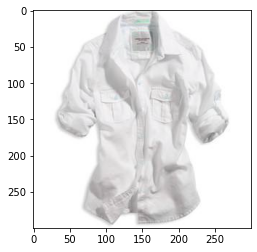

In [13]:
img0 = cv2.imread(data_list[0])
plt.imshow(img0)

In [14]:
#이미지 shape확인!(가로,세로,칼라)의미
img0.shape

(300, 300, 3)

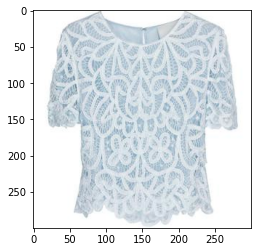

In [15]:
img1 = cv2.imread(data_list[1])
plt.imshow(img1)

In [16]:
data_height = 125
data_width = 125
channel_n = 3#칼라로 맞추기(흑백이면 1)칼라는 rgb3개를 고려해야하기 때문에 3이다.

In [17]:
## 이미지 표준화(0~1사이로)
## 픽셀은 0~255의 크기를 가지므로 255로 나누어서 
## 표준화를 진행해주자.(0~1사이로표시)
## 4000개의 크기를 다 변경해주세요
img_list = []#크기를 변경하고 나서의 결과를 모아주기 위한 리스트
# 7652개의 이미지 전처리(스케일링)
for x in data_list:
    #픽셀크기가(0~255)이므로 255로 나누자
    scaled_one = cv2.imread(x) / 255
    resized_one = cv2.resize(scaled_one, (data_height, data_width))
#     print('변경 전', scaled_one.shape)
#     print('변경 후', resized_one.shape)    
    img_list.append(resized_one)
len(img_list),img_list[0].shape

(7652, (125, 125, 3))

In [18]:
img_list[0][0]

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.

In [19]:
##data_list : 전체 이미지 목록의 리스트
##읽어온 이미지 목록을 넣으면 라벨링/이미지 스케일링/리사이징해서
##우리가 원하는 이미지 데이터를 만들자.
def make_file(data_height, data_width, channel_n, data_list_n):#len(data_list)=data_list_n
    ## 라벨링한 결과 넣어줄 리스트 필요
    label = []
    ## 4차원으로 만들어줄 4차원 리스트 필요
    images = np.zeros((data_list_n, data_height, data_width, channel_n))
    ## 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징하자
    for i, image in enumerate(data_list):#i가 1씩증가,data_list에 이미지 목록 다 들어있음
        
        ## 라벨링:
        tokens = text_to_word_sequence(image)#이미지를 토큰으로 끊어주자(이런식으로)
        label.append(tokens[0])#0번째 토큰
        
        ## 읽어서, 스케일링, 리사이징해서
        image2 = cv2.imread(image)
        image3 = cv2.resize(image2,(data_height, data_width)) / 255
        
        ## 4차원 리스트에 하나씩 끼자
        images[i, :, :, :] = image3
    label2 = np.array(label)
    return label2, images

In [20]:
labels, images = make_file(data_height, data_width, channel_n, 7652)#7652개의 이미지

In [21]:
#labels에 어떤 옷인지에 대한 카테고리 토큰만 담김
labels

array(['blouse', 'blouse', 'blouse', ..., 'tshirt', 'tshirt', 'tshirt'],
      dtype='<U7')

In [22]:
#7652개 1차원의 shape을 가짐['blouse', 'blouse', 'jacket', ..., 'tshirt']
labels.shape

(7652,)

In [23]:
items = label2
#카테고리를 라벨인코더를 통해 수치화 시켜보자.
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 0, 0, ..., 7, 7, 7], dtype=int64), 7652)

In [24]:
encoder.classes_

array(['blouse', 'dress', 'jacket', 'pants', 'shorts', 'skirt', 'sweater',
       'tshirt'], dtype='<U7')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = images
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size= 0.2,
                                                    random_state=55
                                                   )
print(X_train.shape, X_test.shape)

(6121, 125, 125, 3) (1531, 125, 125, 3)


In [27]:
## 딥러닝 모델을 만들어보자.
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import datasets, layers, models

In [28]:
model = models.Sequential()

In [29]:
## 특성추출 레이어를 쌓아준다.
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model.add(MaxPool2D((2,2)))#최대값으로 요약
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))#최대값으로 요약

## 딥러닝 학습 레이어를 쌓아준다.
## 입력 -- 히든 -- 출력 순서대로 쌓아준다.
## 입력(1개)--1차원이어야함
model.add(Flatten())#이미지 데이터를 1차원으로 만들어주는 객체
## 히든(N개)
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌
model.add(Dense(16, activation='relu'))
model.add(Dropout(rate=0.5))#오버피팅 되는 것을 막기 위해 공부한거 드랍아웃 해줌

## 출력(1개)--딥러닝으로 하는 학습의 종류에 따라 다르게 써주어야 함!
## 이진 분류인경우(1, sigmoid)
## 다중 분류인경우(1, softmax)
## 회귀인 경우(1, linear)
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 64)                3

In [30]:
## 모델의 설정값 지정
## 1. 기울기 찾는데 최적의 방법 설정(optimizer)
## 2. 특정한 가중치를 가지는 경우 오차를 계산하는 방법 설정(loss)
##    회귀인 경우: mae
##    분류인 경우: 이진=> binary_crossentropy,
##    다중분류인 경우=> sparse_categorical_crossentropy
## 3. fit시킬 때 fit시키는 상황이 순서대로 프린트되는데 출력되는 항목 설정(metrics)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
## 공부시키자
# epoch마다 train의 loss,acc 뿐만아니라 test의 loss,acc도 알고싶어
# fit함수안에 validation_data=(X_test, y_test)를 넣어 돌려보자.
# 조기종료(earlyStopping) : 
# epoch를 실행할 때 최적의 acc인 경우, 더이상 epoch를 수행하지 않아도 되도록 설정
# 모델저장(checkPoint):
# 최적의 acc인 경우의 가중치를 자동으로 모델파일로 저장하게 설정
# 특정한 상황을 기다렸다가 특정한 처리를 하고자 하는 경우(콜백함수)
# 1)객체를 만들어주고, fit(callbacks = [객체])
es = EarlyStopping(patience=5, restore_best_weights=True)
cp = ModelCheckpoint('best_cnn_1.h5')
cnn_history = model.fit(
    X_train,
    y_train,
    batch_size=80,
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[es, cp],
    verbose=2
)

Epoch 1/30
77/77 - 41s - loss: 2.1329 - accuracy: 0.1296 - val_loss: 2.0792 - val_accuracy: 0.1274 - 41s/epoch - 533ms/step
Epoch 2/30
77/77 - 40s - loss: 2.0776 - accuracy: 0.1346 - val_loss: 2.0797 - val_accuracy: 0.1287 - 40s/epoch - 521ms/step
Epoch 3/30
77/77 - 48s - loss: 2.0744 - accuracy: 0.1346 - val_loss: 2.0778 - val_accuracy: 0.1626 - 48s/epoch - 629ms/step
Epoch 4/30
77/77 - 85s - loss: 2.0582 - accuracy: 0.1568 - val_loss: 2.0524 - val_accuracy: 0.2149 - 85s/epoch - 1s/step
Epoch 5/30
77/77 - 86s - loss: 2.0169 - accuracy: 0.1823 - val_loss: 1.9936 - val_accuracy: 0.2051 - 86s/epoch - 1s/step
Epoch 6/30
77/77 - 62s - loss: 1.9640 - accuracy: 0.1980 - val_loss: 1.9233 - val_accuracy: 0.2208 - 62s/epoch - 807ms/step
Epoch 7/30
77/77 - 84s - loss: 1.9309 - accuracy: 0.2176 - val_loss: 1.9156 - val_accuracy: 0.2123 - 84s/epoch - 1s/step
Epoch 8/30
77/77 - 64s - loss: 1.9187 - accuracy: 0.2179 - val_loss: 1.9417 - val_accuracy: 0.1953 - 64s/epoch - 827ms/step
Epoch 9/30


In [ ]:
test_result = model.evaluate(X_test,y_test) 
test_result

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) ## 1행2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc.')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc','test_acc'])

plt.subplot(1, 2, 2) ## 1행2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','test_loss'])